# Credit cards Fraud Detection

## Objetivo

Analizar los datos de un dataset para predecir el costo de un seguro médico.

## Ejecución

### Imports

In [4]:
import sys;
assert sys.version_info >= (3, 5);
import sklearn;
assert sklearn.__version__ >= "0.20";
import numpy as np;
import math;
import os;
import matplotlib as mpl;
import matplotlib.pyplot as plt;
import pandas as pd;
import seaborn as sns;
from scipy import stats;
from scipy.stats import norm;
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Datos

#### Carga de datos

In [8]:
# dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
df = pd.read_csv(filepath_or_buffer="dataset/creditcard_sin_outliers.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Exploración de datos

Esta primera aproximación nos permite ver que tenemos 31 columas, de las cuales 1 es int y el resto son float. Además, podemos ver que no tenemos valores nulos.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225562 entries, 0 to 225561
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    225562 non-null  float64
 1   V1      225562 non-null  float64
 2   V2      225562 non-null  float64
 3   V3      225562 non-null  float64
 4   V4      225562 non-null  float64
 5   V5      225562 non-null  float64
 6   V6      225562 non-null  float64
 7   V7      225562 non-null  float64
 8   V8      225562 non-null  float64
 9   V9      225562 non-null  float64
 10  V10     225562 non-null  float64
 11  V11     225562 non-null  float64
 12  V12     225562 non-null  float64
 13  V13     225562 non-null  float64
 14  V14     225562 non-null  float64
 15  V15     225562 non-null  float64
 16  V16     225562 non-null  float64
 17  V17     225562 non-null  float64
 18  V18     225562 non-null  float64
 19  V19     225562 non-null  float64
 20  V20     225562 non-null  float64
 21  V21     22

Estos datos a priori no nos dicen mucho, pero podemos ver que tenemos 30 columnas que son los datos de entrada y la columna parece que valor binario por lo que podemos suponer que es la columna que queremos predecir.

In [74]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,...,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000,225562.000000
mean,93596.146674,0.227036,0.077263,0.034995,0.315139,0.044173,-0.072983,0.070641,0.001302,0.020486,...,0.005547,-0.019060,0.002269,0.003051,-0.009133,0.023840,-0.003737,0.002680,80.984564,0.002181
std,47489.199537,1.551206,1.208383,1.420860,1.146834,1.148792,1.180068,0.993598,0.878302,0.917780,...,0.574012,0.697856,0.426905,0.576250,0.493902,0.472935,0.283297,0.181652,184.669831,0.046653
min,0.000000,-30.552380,-8.494104,-31.103685,-1.399981,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.097638,-4.781606,-1.199587,-7.263482,-1.896821,0.000000,0.000000
25%,53411.000000,-0.777985,-0.478365,-0.848517,-0.548372,-0.602632,-0.780557,-0.459546,-0.209065,-0.538922,...,-0.225378,-0.562337,-0.151022,-0.333871,-0.319737,-0.310975,-0.070998,-0.049747,4.990000,0.000000
50%,82591.500000,0.326761,0.125880,0.192591,0.190394,-0.009432,-0.308966,0.086265,0.006922,-0.036382,...,-0.025841,-0.016718,-0.009181,0.044116,0.008224,-0.000441,-0.004966,0.011664,20.000000,0.000000
75%,138533.750000,1.338111,0.837136,1.021007,0.873541,0.613231,0.308576,0.596738,0.278862,0.550154,...,0.183734,0.500415,0.140379,0.424154,0.334906,0.257173,0.078407,0.073159,74.000000,0.000000
max,172792.000000,2.366096,22.057729,4.187811,12.114672,11.095089,6.481326,12.735925,20.007208,3.399727,...,27.202839,8.361985,5.485748,1.099542,2.297135,2.790437,3.063540,1.798764,3465.660000,1.000000


Con los histogramas no vemos distribuciones muy normales

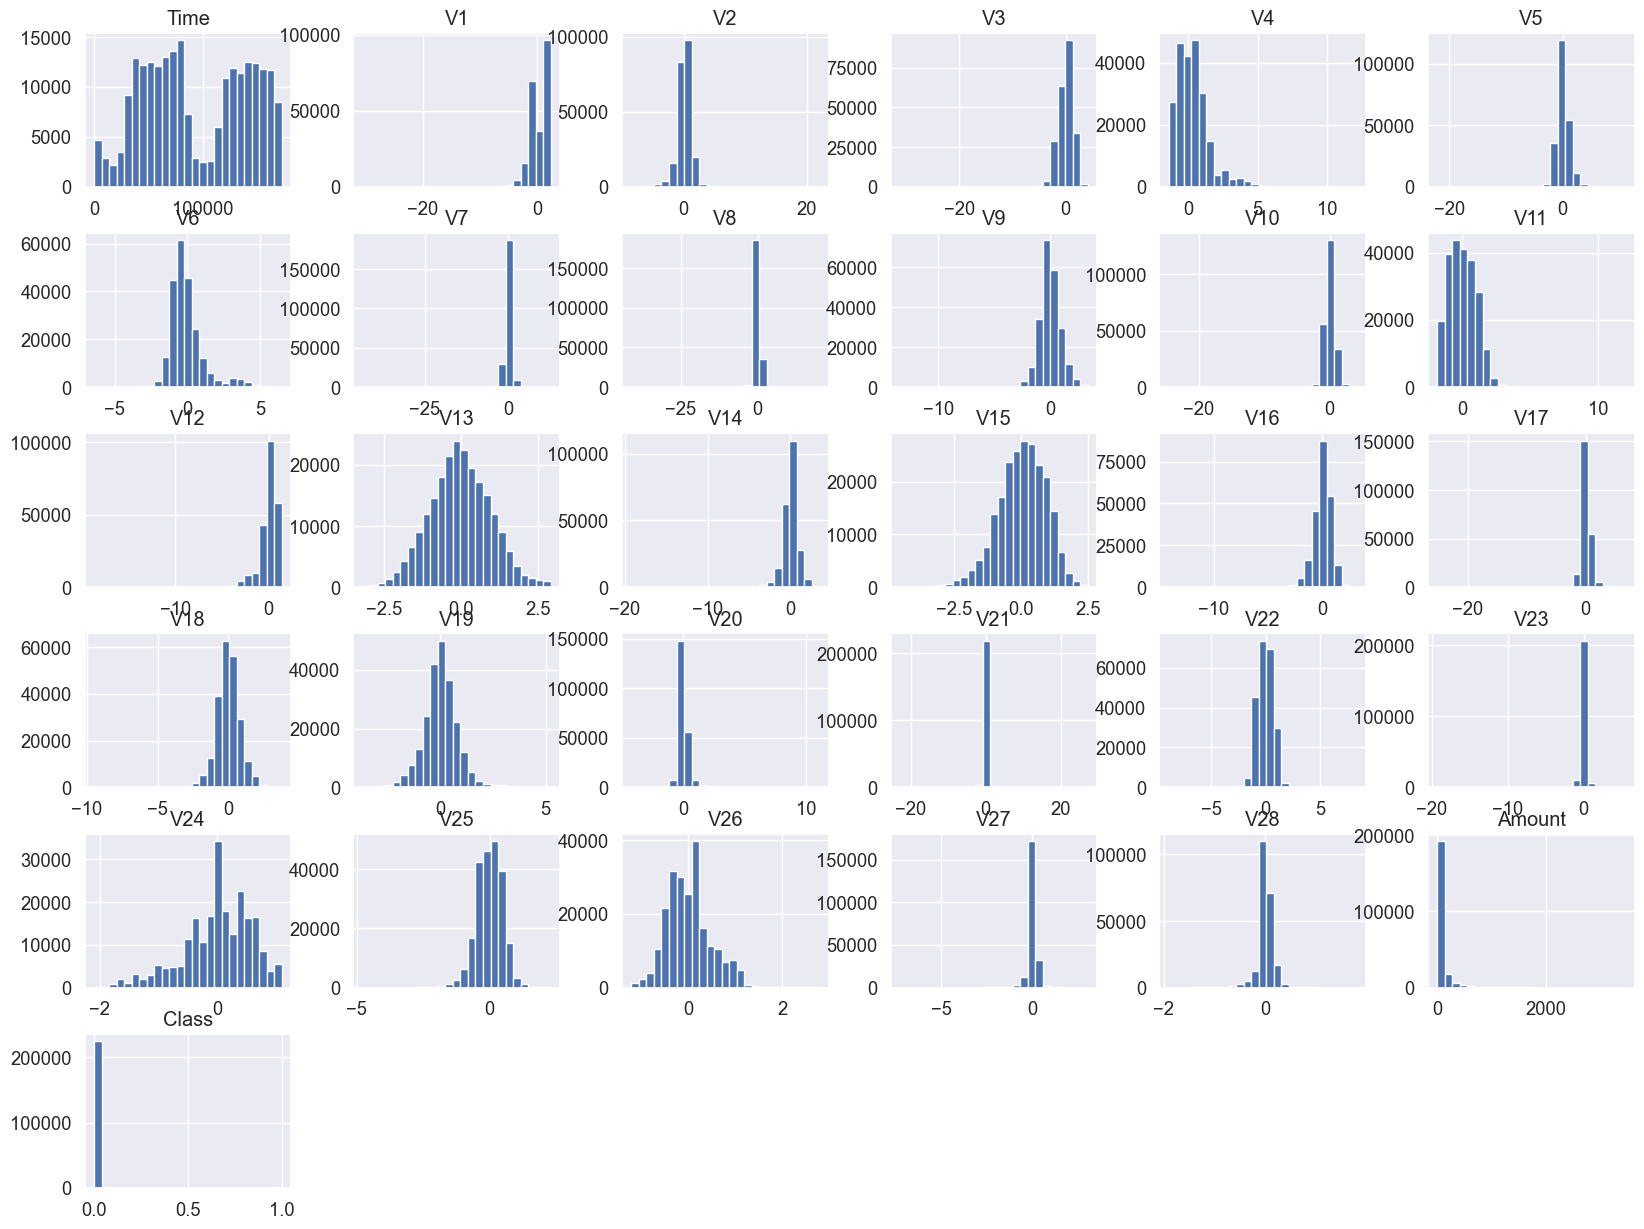

In [75]:
df.hist(bins=25, figsize=(20,15))
plt.show()

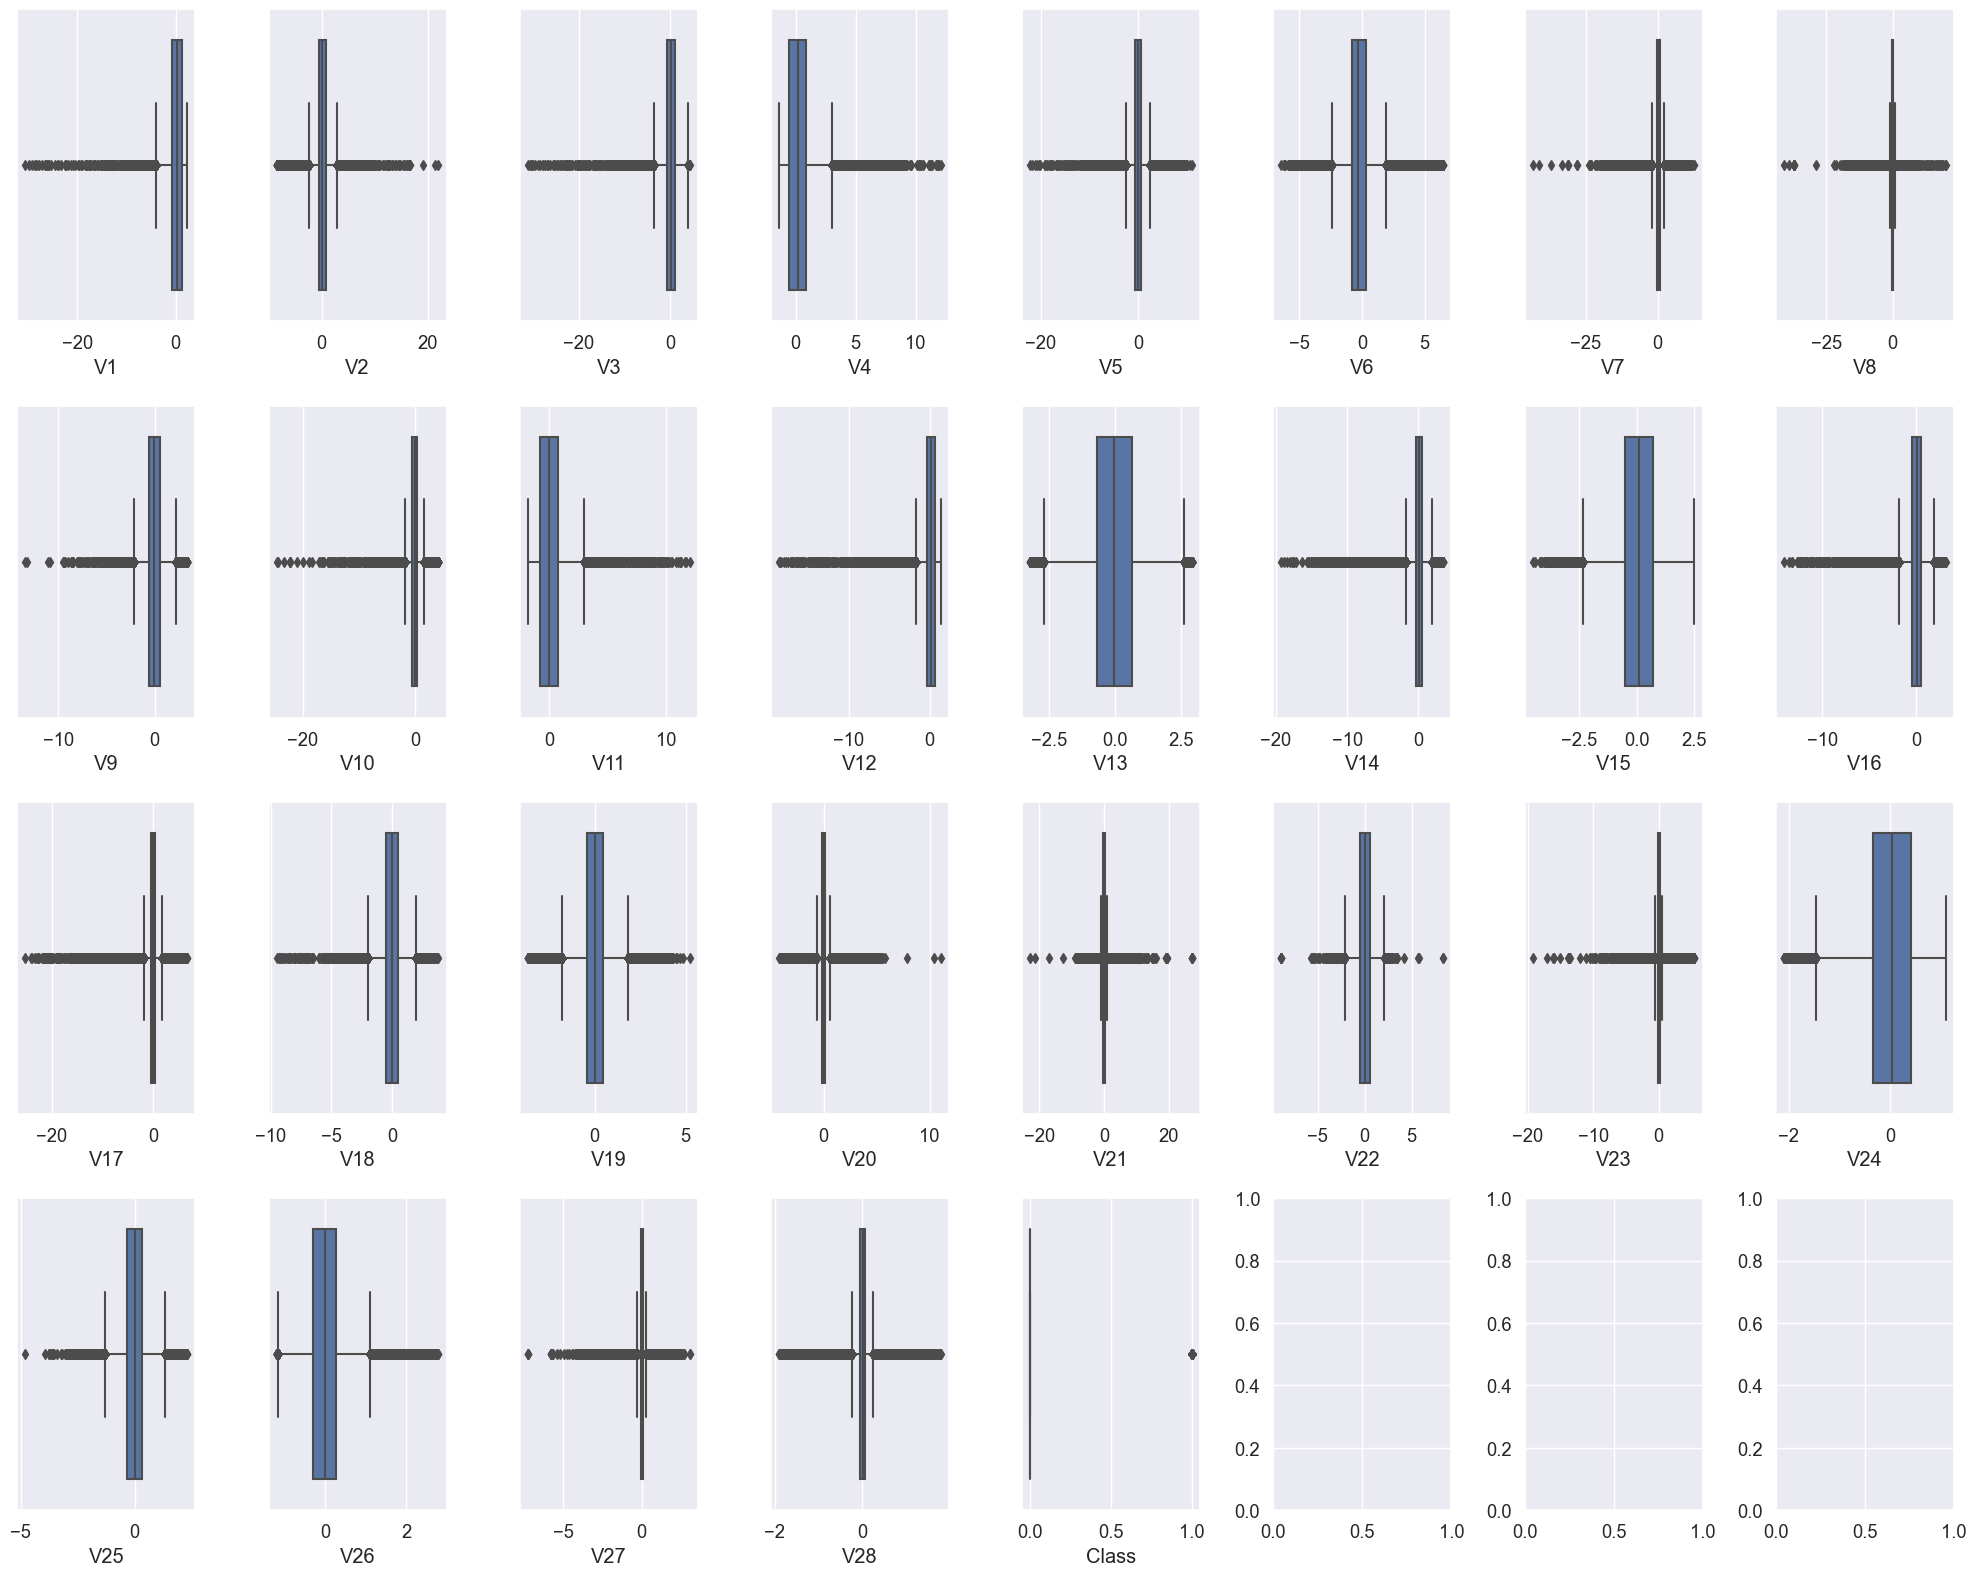

In [83]:
# show the boxplot of all the features separately in some subplots
fig, ax = plt.subplots(4, 8, figsize=(20,16))
for variable, subplot in zip(df.columns, ax.flatten()):
    # make the boxplot horizontal
    sns.boxplot(x=df[variable], ax=subplot)
fig.tight_layout()
plt.show()

También parece que casi todos los datos de la columna `Class` están en 0, lo que es un claro problema para el aprendizaje.

In [77]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.78 % of the dataset
Frauds 0.22 % of the dataset


#### Eliminar Outliers

Está en markdown porque tarda mucho en ejecutarse entonces lo he descargado en un archivo csv y uso ese 
como origen de datos.

```python
df_copy = df.copy()
df = df_copy.copy()
print(df["Class"].value_counts())
for i in range(1, 29):
    fraudes = df["Class"].value_counts()[1]
    print("V"+str(i)+" start")
    for j in range(-600, 10):
        df = df[df['V'+str(i)].between(-30, -j/10)]

        if fraudes > df["Class"].value_counts()[1]:
            df = df_copy
            break
        else:
            df_copy = df
    print("V"+str(i)+" negative")
    for j in range(-600, 10):
        df = df[df['V'+str(i)].between(j/10, 30)]

        if fraudes > df["Class"].value_counts()[1]:
            df = df_copy
            break
        else:
            df_copy = df
    print("V"+str(i)+" finished")

print(df["Class"].value_counts())

```


#### Borrar datos sobrantes

In [9]:
df = df.drop(['Time'], axis=1)
df = df.drop(['Amount'], axis=1)

fraudes = df[df['Class'] == 1].copy()
no_fraudes = df[df['Class'] == 0].copy()

no_fraudes = sklearn.utils.shuffle(no_fraudes)
no_fraudes = no_fraudes.sample(len(fraudes)*10)

df2 = pd.concat([fraudes, no_fraudes], axis=0)
df2 = sklearn.utils.shuffle(df2)

In [ ]:
# see the number of rows
print(len(df2))

5412


In [11]:
x = df2.drop(['Class'], axis=1)
y = df2['Class']

#### Correlaciones

Con los datos categoricos pasados a numericos podemos observar correlaciones que en un principio no podíamos.

In [ ]:
corrmat = df2.corr().abs()
# show the correlation between the features class and Time
corrmat["Class"].sort_values(ascending=False)

Class    1.000000
V14      0.797336
V12      0.740696
V10      0.700408
V11      0.666804
V4       0.662083
V16      0.656293
V17      0.655990
V3       0.632234
V7       0.573653
V9       0.546557
V2       0.514055
V1       0.501226
V18      0.488702
V5       0.433325
V6       0.294363
V19      0.208470
V20      0.179434
V21      0.157222
V27      0.101427
V28      0.089143
V8       0.074245
V24      0.051352
V15      0.040847
V25      0.025388
V13      0.022895
V26      0.018363
V23      0.015365
V22      0.008906
Name: Class, dtype: float64

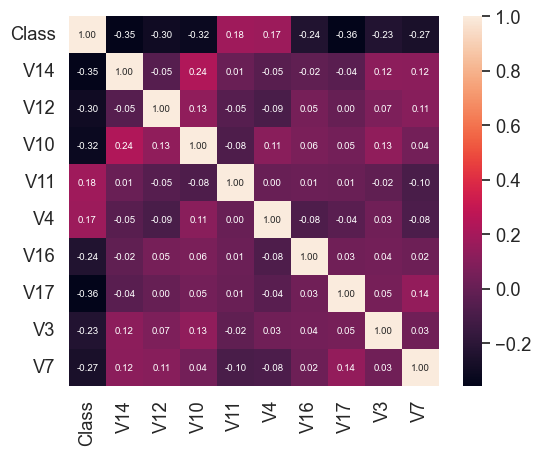

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Class')['Class'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### PCA

In [12]:
from sklearn.decomposition import PCA
pca_x = PCA(n_components=2).fit_transform(x)
# pca_x to dataframe
pca_x_df = pd.DataFrame(data=pca_x, columns=['PC1', 'PC2'])

In [ ]:
pca_x_df

,PC1,PC2
0,-2.044876,-0.224722
1,-2.083265,-0.122014
2,-1.861428,-0.179181
3,-1.479804,0.636308
4,-1.745343,0.288043
...,...,...
5407,-1.830810,-0.269910
5408,-2.056130,-0.076179
5409,-1.694779,0.797442
5410,-1.950131,-0.001021


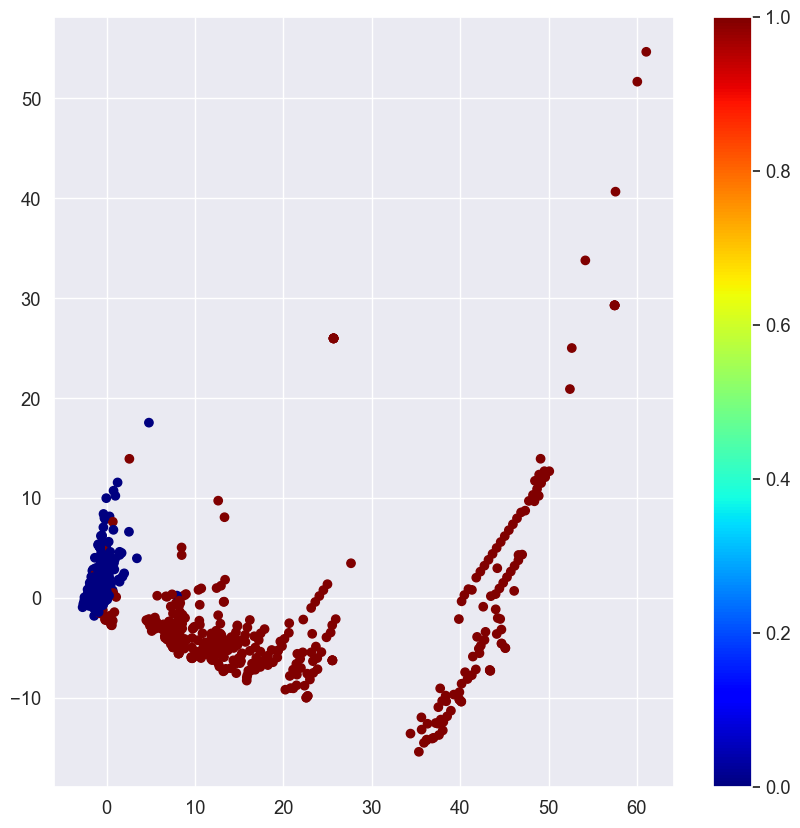

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(pca_x[:, 0], pca_x[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.show()

#### KMeans

c:\Users\brais.fernandezvazqu\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


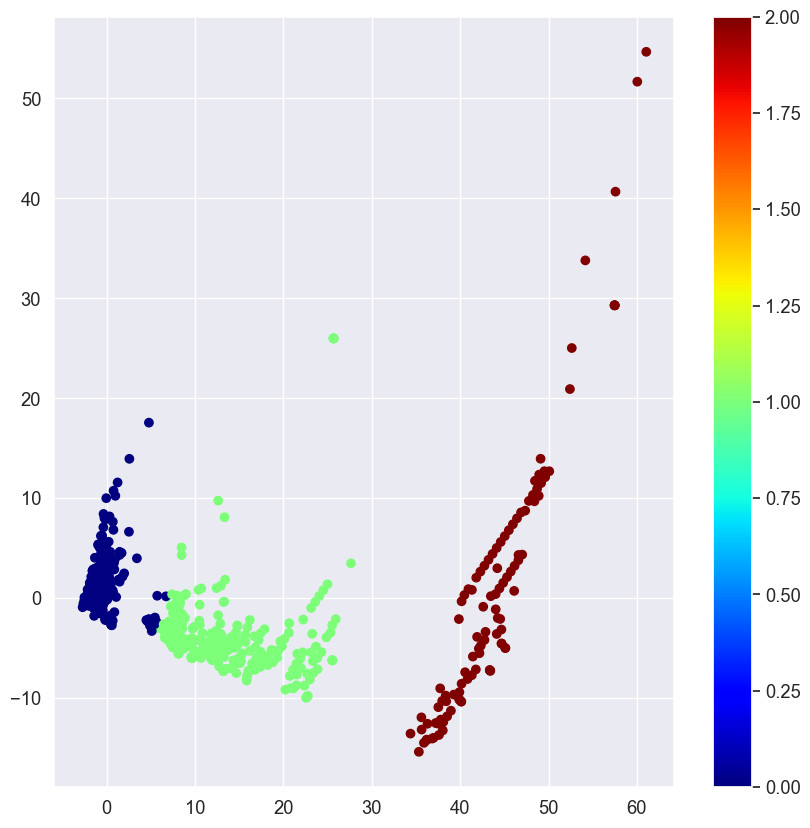

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
y_pred = kmeans.predict(x)

plt.figure(figsize=(10, 10))
plt.scatter(pca_x[:, 0], pca_x[:, 1], c=y_pred, cmap='jet')
plt.colorbar()
plt.show()


#### DBSCAN

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=6, min_samples=5)
predict = dbscan.fit(x)
y_pred = predict.labels_
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


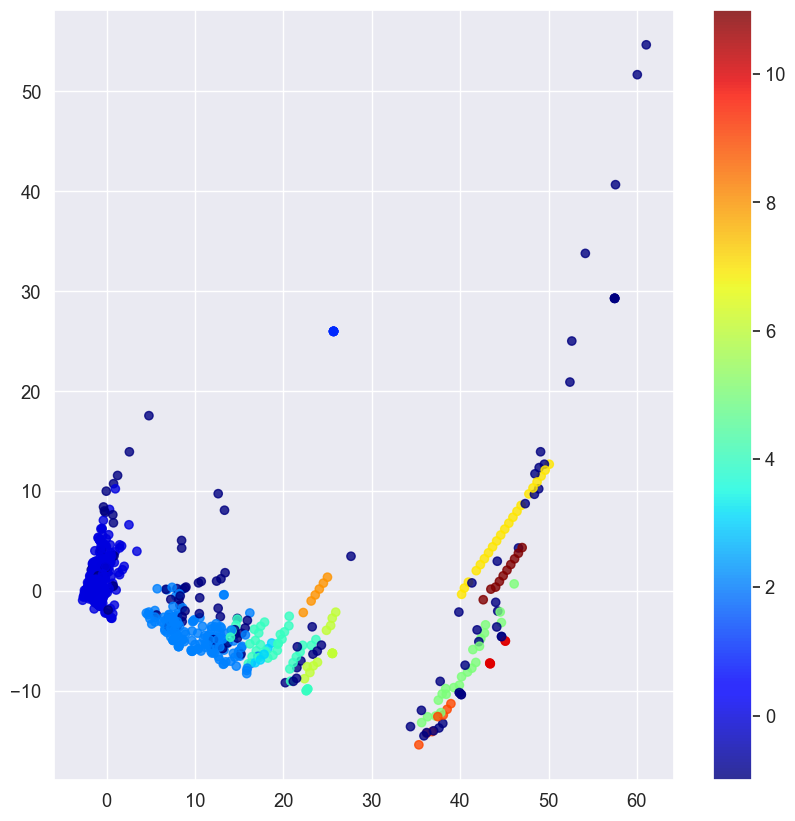

In [ ]:
plt.figure(figsize=(10, 10))

#plot_dbscan(dbscan, pca_x, size=100)
plt.scatter(pca_x[:, 0], pca_x[:, 1], c=y_pred, cmap='jet', alpha=0.8)
plt.colorbar()
plt.show()